<a href="https://colab.research.google.com/github/Sowmya-2348562/Quantum-Computing/blob/main/2348562_QC_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

In [3]:
from qiskit import QuantumCircuit
from random import choice

# Step 1: Define the Oracle (Query Gate)
def deutsch_jozsa_oracle(n, balanced=True):
    oracle = QuantumCircuit(n + 1)
    if balanced:
        for qubit in range(n):
            oracle.cx(qubit, n)
    else:
        oracle.x(n)
    return oracle

# Step 2: Define the Deutsch-Jozsa Circuit
def deutsch_jozsa_circuit(n, oracle):
    dj_circuit = QuantumCircuit(n + 1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.append(oracle.to_gate(), range(n + 1))
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.measure(range(n), range(n))
    return dj_circuit

# Step 3: Manual Simulation of Results
def simulate_deutsch_jozsa(n, balanced):
    """
    Simulate Deutsch-Jozsa algorithm manually based on the algorithm's behavior.

    Parameters:
        n (int): Number of input qubits.
        balanced (bool): Whether the function is balanced or constant.
    """
    if balanced:
        print("\nExpected Result: Function is BALANCED.")
        print("Output after Hadamards: At least one qubit NOT in |0⟩ state.")
    else:
        print("\nExpected Result: Function is CONSTANT.")
        print("Output after Hadamards: All qubits in |0⟩ state.")

# Step 4: Test the Deutsch-Jozsa Algorithm
def test_deutsch_jozsa(n):
    balanced = choice([True, False])  # Randomly decide function type
    oracle = deutsch_jozsa_oracle(n, balanced)
    dj_circuit = deutsch_jozsa_circuit(n, oracle)

    print("\nOracle (Query Gate) for the function:")
    print(oracle.draw())

    print("\nDeutsch-Jozsa Circuit:")
    print(dj_circuit.draw())

    simulate_deutsch_jozsa(n, balanced)

# Example: Test with 3 input qubits
test_deutsch_jozsa(3)



Oracle (Query Gate) for the function:
          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

Deutsch-Jozsa Circuit:
     ┌───┐     ┌──────────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├──────
     ├───┤     │              │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├───
     ├───┤     │  circuit-161 │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2             ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│              │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3             ├──────╫──╫──╫─
     └───┘└───┘└──────────────┘      ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2 

Expected Result: Function is CONSTANT.
Output after Hadamards: All qubits in |0⟩ state.


In [5]:
pip install pylatexenc

In [10]:
from qiskit import QuantumCircuit
import numpy as np

def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

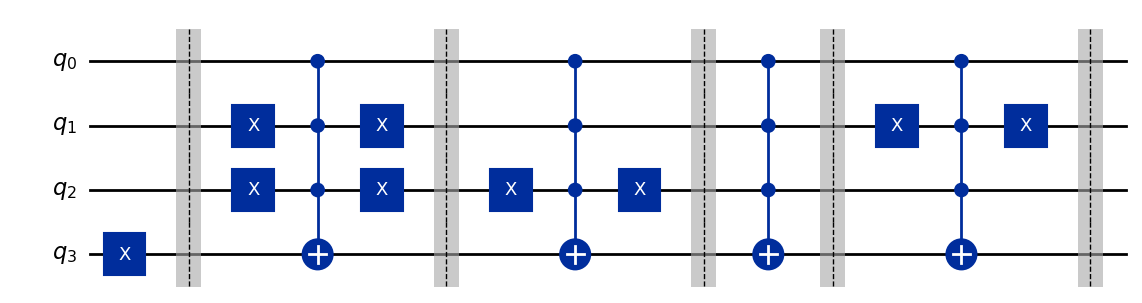

In [11]:
display(dj_function(3).draw('mpl'))

In [12]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [14]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.8 MB/s eta 0:00:00


In [18]:
from qiskit_aer import AerSimulator

def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

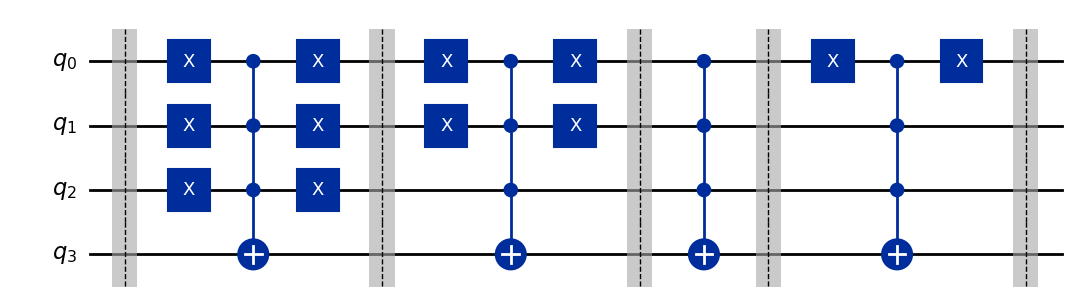

'balanced'

In [19]:
f = dj_function(3)
display(f.draw('mpl'))
display(dj_algorithm(f))